In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

##### Exercise 11.2

In [2]:
# Superparameters
# (Common parameters for all models)
n_epochs = 25
n_training_data = 5000
noise = 0.2
np.random.seed(0)

def polynomial(x, p):
    y = 0
    for i, coefficient in enumerate(p): # enumerate starts from 0
        y += coefficient * x**i
    return y

target_parameters = [4, -3, -2, 3]

# Generate training inputs
in_validation = np.random.uniform(-1, 1, 100)
in_validation.sort()
in_target = in_validation
out_target = polynomial(in_target, target_parameters)

in_training = np.random.uniform(-1, 1, n_training_data)
out_training = np.random.normal(polynomial(in_training, target_parameters), noise)
out_validation = np.random.normal(polynomial(in_validation, target_parameters), noise)

In [3]:
class neural_network:
    def __init__(self, layers, optimizer_fn, loss_fn):
        self.optimizer_fn = optimizer_fn
        self.loss_fn = loss_fn
        self.network = Sequential()
        self.layers_size = [item[0] for item in layers]
        self.activation_functions = [item[1] for item in layers]

###### Definition of the neural networks

In [4]:
from itertools import product

features = [
    ([(1, "tanh"), (8, "tanh"), (1, "elu")], "sgd", "mse"),
    ([(4, "tanh"), (2, "tanh"), (1, "elu")], "sgd", "mse"),
    ([(4, "tanh"), (2, "tanh"), (1, "elu")], "sgd", "mae"),
    ([(4, "tanh"), (2, "tanh"), (1, "elu")], "adagrad", "mse"),
    ([(4, "tanh"), (2, "tanh"), (1, "linear")], "sgd", "mse"),
    ([(4, "tanh"), (2, "tanh"), (1, "linear")], "sgd", "mae"),
    ([(4, "tanh"), (2, "tanh"), (1, "elu")], "adagrad", "mse"),
    ([(4, "tanh"), (2, "elu"), (1, "elu")], "adamax", "mse"),
    ([(64, "tanh"), (32, "tanh"), (1, "linear")], "sgd", "mse"),
    ([(1, "tanh"), (4, "tanh"), (4, "tanh"), (4, "tanh"), (4, "tanh"), (4, "tanh"), (4, "tanh"), (4, "tanh"), (4, "tanh"), (1, "linear")], "sgd", "mse"),
    ([(8, "tanh"), (8, "elu"), (1, "linear")], "sgd", "mse"),
    ([(8, "tanh"), (6, "tanh"), (1, "tanh")], "sgd", "mse"),
]
models = [neural_network(layers, optimizer_fn, loss_fn) for layers, optimizer_fn, loss_fn in features]
for model in models:
    for n in range(len(model.layers_size)):
        if n == 0:
            model.network.add(Dense(
                model.layers_size[n],
                input_shape = (1,),
                activation = model.activation_functions[n]
            ))
        else:
            model.network.add(Dense(
                model.layers_size[n],
                activation = model.activation_functions[n]
            ))

###### Training

In [5]:
model_histories = []
for model in models:
    # Compile the model choosing the optimizer, loss and metrics objects.
    model.network.compile(optimizer = model.optimizer_fn, loss = model.loss_fn, metrics = ["mse"])

    # Evaluate the model using the "training" dataset,
    # over epochs of 32 batch size each.
    model_histories.append(model.network.fit(
        x = in_training,
        y = out_training,
        batch_size = 32,
        epochs = n_epochs,
        shuffle = True, # It is a good idea to shuffle the input before each epoch.
        validation_data = (in_validation, out_validation)
    ))

Train on 5000 samples, validate on 100 samples
Epoch 1/25
5000/5000 [==============================] - 1s 156us/step - loss: 1.0779 - mean_squared_error: 1.0779 - val_loss: 0.3674 - val_mean_squared_error: 0.3674
Epoch 2/25
5000/5000 [==============================] - 0s 14us/step - loss: 0.3234 - mean_squared_error: 0.3234 - val_loss: 0.3513 - val_mean_squared_error: 0.3513
Epoch 3/25
5000/5000 [==============================] - 0s 14us/step - loss: 0.3180 - mean_squared_error: 0.3180 - val_loss: 0.3507 - val_mean_squared_error: 0.3507
Epoch 4/25
5000/5000 [==============================] - 0s 14us/step - loss: 0.3119 - mean_squared_error: 0.3119 - val_loss: 0.3409 - val_mean_squared_error: 0.3409
Epoch 5/25
5000/5000 [==============================] - 0s 15us/step - loss: 0.3069 - mean_squared_error: 0.3069 - val_loss: 0.3433 - val_mean_squared_error: 0.3433
Epoch 6/25
5000/5000 [==============================] - 0s 15us/step - loss: 0.3019 - mean_squared_error: 0.3019 - val_loss: 0.

Epoch 25/25
5000/5000 [==============================] - 0s 16us/step - loss: 0.0422 - mean_squared_error: 0.0422 - val_loss: 0.0522 - val_mean_squared_error: 0.0522
Train on 5000 samples, validate on 100 samples
Epoch 1/25
5000/5000 [==============================] - 0s 89us/step - loss: 1.4184 - mean_squared_error: 3.1367 - val_loss: 0.6999 - val_mean_squared_error: 0.7200
Epoch 2/25
5000/5000 [==============================] - 0s 16us/step - loss: 0.5289 - mean_squared_error: 0.4503 - val_loss: 0.4595 - val_mean_squared_error: 0.3829
Epoch 3/25
5000/5000 [==============================] - 0s 17us/step - loss: 0.4147 - mean_squared_error: 0.3426 - val_loss: 0.4438 - val_mean_squared_error: 0.4085
Epoch 4/25
5000/5000 [==============================] - 0s 16us/step - loss: 0.3900 - mean_squared_error: 0.3325 - val_loss: 0.4218 - val_mean_squared_error: 0.3903
Epoch 5/25
5000/5000 [==============================] - 0s 15us/step - loss: 0.3592 - mean_squared_error: 0.2886 - val_loss: 0.

Epoch 24/25
5000/5000 [==============================] - 0s 16us/step - loss: 0.4340 - mean_squared_error: 0.4340 - val_loss: 0.4264 - val_mean_squared_error: 0.4264
Epoch 25/25
5000/5000 [==============================] - 0s 17us/step - loss: 0.4293 - mean_squared_error: 0.4293 - val_loss: 0.4242 - val_mean_squared_error: 0.4242
Train on 5000 samples, validate on 100 samples
Epoch 1/25
5000/5000 [==============================] - 0s 94us/step - loss: 1.4064 - mean_squared_error: 1.4064 - val_loss: 0.3893 - val_mean_squared_error: 0.3893
Epoch 2/25
5000/5000 [==============================] - 0s 16us/step - loss: 0.3517 - mean_squared_error: 0.3517 - val_loss: 0.3805 - val_mean_squared_error: 0.3805
Epoch 3/25
5000/5000 [==============================] - 0s 16us/step - loss: 0.3342 - mean_squared_error: 0.3342 - val_loss: 0.3632 - val_mean_squared_error: 0.3632
Epoch 4/25
5000/5000 [==============================] - 0s 15us/step - loss: 0.3045 - mean_squared_error: 0.3045 - val_loss: 0

Epoch 23/25
5000/5000 [==============================] - 0s 16us/step - loss: 0.1639 - mean_squared_error: 0.0432 - val_loss: 0.1865 - val_mean_squared_error: 0.0543
Epoch 24/25
5000/5000 [==============================] - 0s 16us/step - loss: 0.1631 - mean_squared_error: 0.0430 - val_loss: 0.1877 - val_mean_squared_error: 0.0550
Epoch 25/25
5000/5000 [==============================] - 0s 16us/step - loss: 0.1626 - mean_squared_error: 0.0425 - val_loss: 0.1848 - val_mean_squared_error: 0.0538
Train on 5000 samples, validate on 100 samples
Epoch 1/25
5000/5000 [==============================] - 1s 110us/step - loss: 6.5170 - mean_squared_error: 6.5170 - val_loss: 3.6216 - val_mean_squared_error: 3.6216
Epoch 2/25
5000/5000 [==============================] - 0s 17us/step - loss: 2.5863 - mean_squared_error: 2.5863 - val_loss: 1.6663 - val_mean_squared_error: 1.6663
Epoch 3/25
5000/5000 [==============================] - 0s 17us/step - loss: 1.3953 - mean_squared_error: 1.3953 - val_loss:

Epoch 22/25
5000/5000 [==============================] - 0s 18us/step - loss: 0.0651 - mean_squared_error: 0.0651 - val_loss: 0.0753 - val_mean_squared_error: 0.0753
Epoch 23/25
5000/5000 [==============================] - 0s 18us/step - loss: 0.0618 - mean_squared_error: 0.0618 - val_loss: 0.0731 - val_mean_squared_error: 0.0731
Epoch 24/25
5000/5000 [==============================] - 0s 19us/step - loss: 0.0593 - mean_squared_error: 0.0593 - val_loss: 0.0725 - val_mean_squared_error: 0.0725
Epoch 25/25
5000/5000 [==============================] - 0s 18us/step - loss: 0.0574 - mean_squared_error: 0.0574 - val_loss: 0.0689 - val_mean_squared_error: 0.0689
Train on 5000 samples, validate on 100 samples
Epoch 1/25
5000/5000 [==============================] - 1s 113us/step - loss: 0.9017 - mean_squared_error: 0.9017 - val_loss: 0.5512 - val_mean_squared_error: 0.5512
Epoch 2/25
5000/5000 [==============================] - 0s 17us/step - loss: 0.4460 - mean_squared_error: 0.4460 - val_loss

Epoch 21/25
5000/5000 [==============================] - 0s 23us/step - loss: 0.2486 - mean_squared_error: 0.2486 - val_loss: 0.2186 - val_mean_squared_error: 0.2186
Epoch 22/25
5000/5000 [==============================] - 0s 22us/step - loss: 0.1905 - mean_squared_error: 0.1905 - val_loss: 0.1700 - val_mean_squared_error: 0.1700
Epoch 23/25
5000/5000 [==============================] - 0s 23us/step - loss: 0.1111 - mean_squared_error: 0.1111 - val_loss: 0.1366 - val_mean_squared_error: 0.1366
Epoch 24/25
5000/5000 [==============================] - 0s 22us/step - loss: 0.0913 - mean_squared_error: 0.0913 - val_loss: 0.0664 - val_mean_squared_error: 0.0664
Epoch 25/25
5000/5000 [==============================] - 0s 23us/step - loss: 0.0840 - mean_squared_error: 0.0840 - val_loss: 0.0612 - val_mean_squared_error: 0.0612
Train on 5000 samples, validate on 100 samples
Epoch 1/25
5000/5000 [==============================] - 1s 126us/step - loss: 0.9005 - mean_squared_error: 0.9005 - val_los

Epoch 20/25
5000/5000 [==============================] - 0s 17us/step - loss: 6.6093 - mean_squared_error: 6.6093 - val_loss: 6.4810 - val_mean_squared_error: 6.4810
Epoch 21/25
5000/5000 [==============================] - 0s 17us/step - loss: 6.6093 - mean_squared_error: 6.6093 - val_loss: 6.4810 - val_mean_squared_error: 6.4810
Epoch 22/25
5000/5000 [==============================] - 0s 17us/step - loss: 6.6092 - mean_squared_error: 6.6092 - val_loss: 6.4809 - val_mean_squared_error: 6.4809
Epoch 23/25
5000/5000 [==============================] - 0s 17us/step - loss: 6.6091 - mean_squared_error: 6.6091 - val_loss: 6.4809 - val_mean_squared_error: 6.4809
Epoch 24/25
5000/5000 [==============================] - 0s 17us/step - loss: 6.6091 - mean_squared_error: 6.6091 - val_loss: 6.4808 - val_mean_squared_error: 6.4808
Epoch 25/25
5000/5000 [==============================] - 0s 17us/step - loss: 6.6091 - mean_squared_error: 6.6091 - val_loss: 6.4808 - val_mean_squared_error: 6.4808


###### Evaluation on test data and predictions

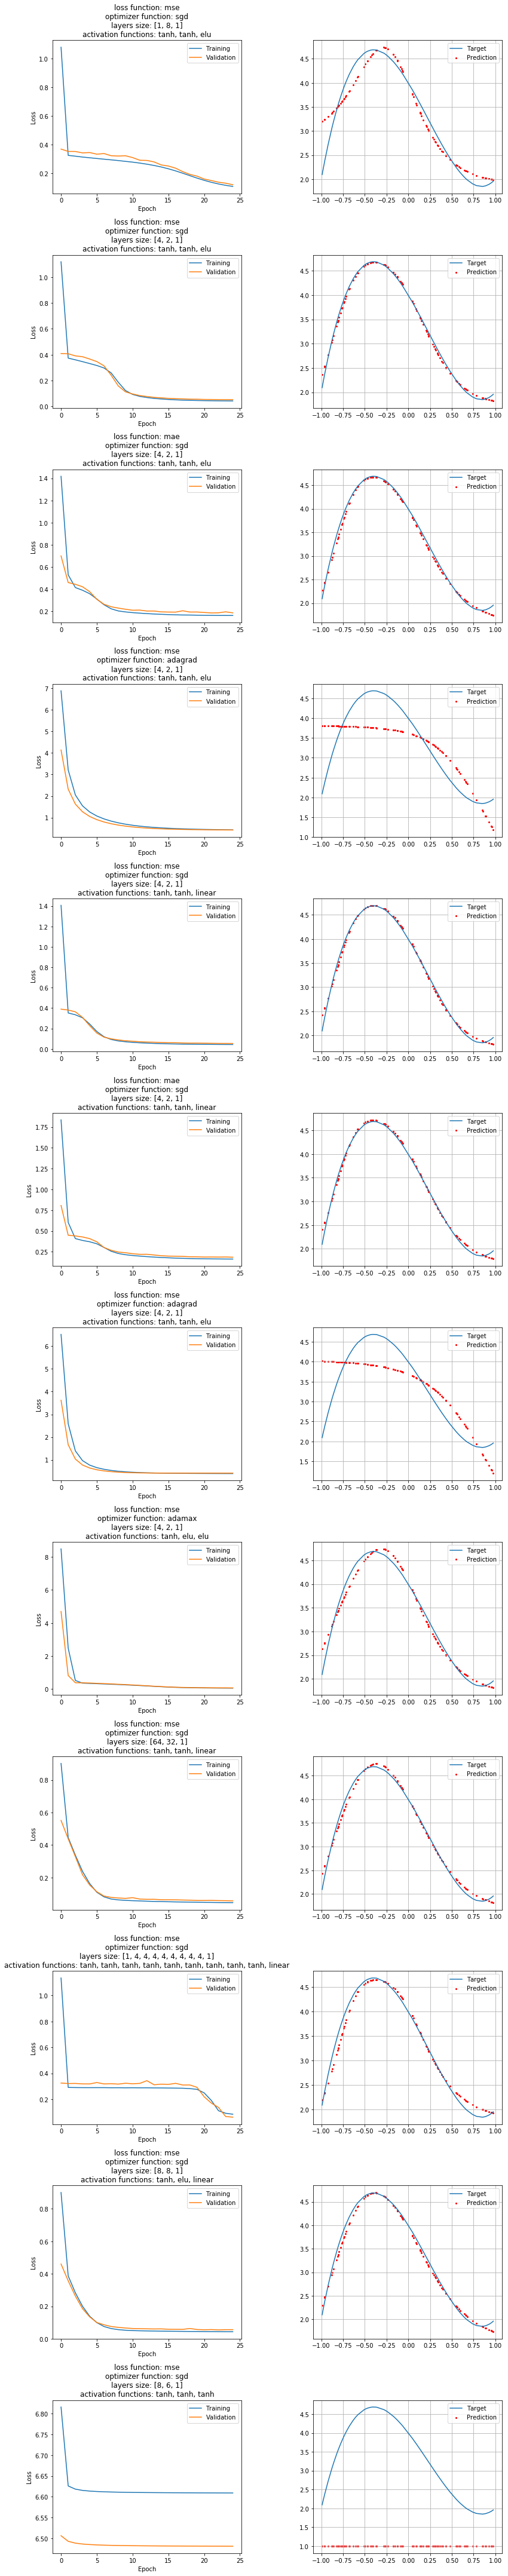

In [10]:
# Plot training info and compare predictions to target data.
n_plot_types = 2
fig, axes = plt.subplots(nrows = len(models), ncols = n_plot_types, figsize = (12, len(models) * 5))
axes = axes.flatten()

for i, (model, history) in enumerate(zip(models, model_histories)):
    # Validation results
    axes[n_plot_types * i].plot(history.history["loss"])
    axes[n_plot_types * i].plot(history.history["val_loss"])
    axes[n_plot_types * i].set_title(
        "loss function: " + model.loss_fn
        + "\noptimizer function: " + model.optimizer_fn
        + "\nlayers size: " + str(model.layers_size)
        + "\nactivation functions: " + ", ".join(model.activation_functions)
    )
    axes[n_plot_types * i].set_ylabel("Loss")
    axes[n_plot_types * i].set_xlabel("Epoch")
    axes[n_plot_types * i].legend(["Training", "Validation"], loc = "best")
    
    # Prediction
    out_predicted = model.network.predict(in_target)
    axes[n_plot_types * i + 1].scatter(in_target, out_predicted, color = "red", s = 4)
    axes[n_plot_types * i + 1].plot(in_target, out_target)
    axes[n_plot_types * i + 1].legend(["Target", "Prediction"], loc = "best")
    axes[n_plot_types * i + 1].grid(True)

fig.tight_layout()
plt.show()

###### Comments

Here are some sparse comments.
* It seems that a *tanh* activation function in the output layer is a no-go: whenever I chose this function, the output was way off the target, and the accuracy levels were too high.
* Models with a *linear* function in the output neuron generally gave the best results, with *elu* a close second.
* Networks that used a *mean average error* loss function converged, after the same number of epochs, to a higher accuracy level than those which used a *mean squared error* (all other feaures being equal); the predicted data however, from a glance at the plots on the right, did not vary that much between the two cases.
* A single-unit input layer input layer is not good.
* Adding a great amount of middle layers does not help, on the contrary, it produces worse results, and so does adding a lot of units to a layer.
* Results of networks trained using *adamax* and *adagrad* optimizers were simply bad. Accuracy levels converge to a generally low value, but as the plots on the right show, predicted values doesn't seem to have anything at all with the target data.
* Unfortunately none of the networks I tried to train was able to model correctly the region of the data closer to 1, where there is a local minimum of the target function. This may happen because the "rate of change" of the input in such region is higher than in the rest of the data.

###### Generalisation
Judging from the plots below, it is safe to say that none of the networks defined above was able to guess the correct form of the input data, and thus to generalise to data outside of the training region.

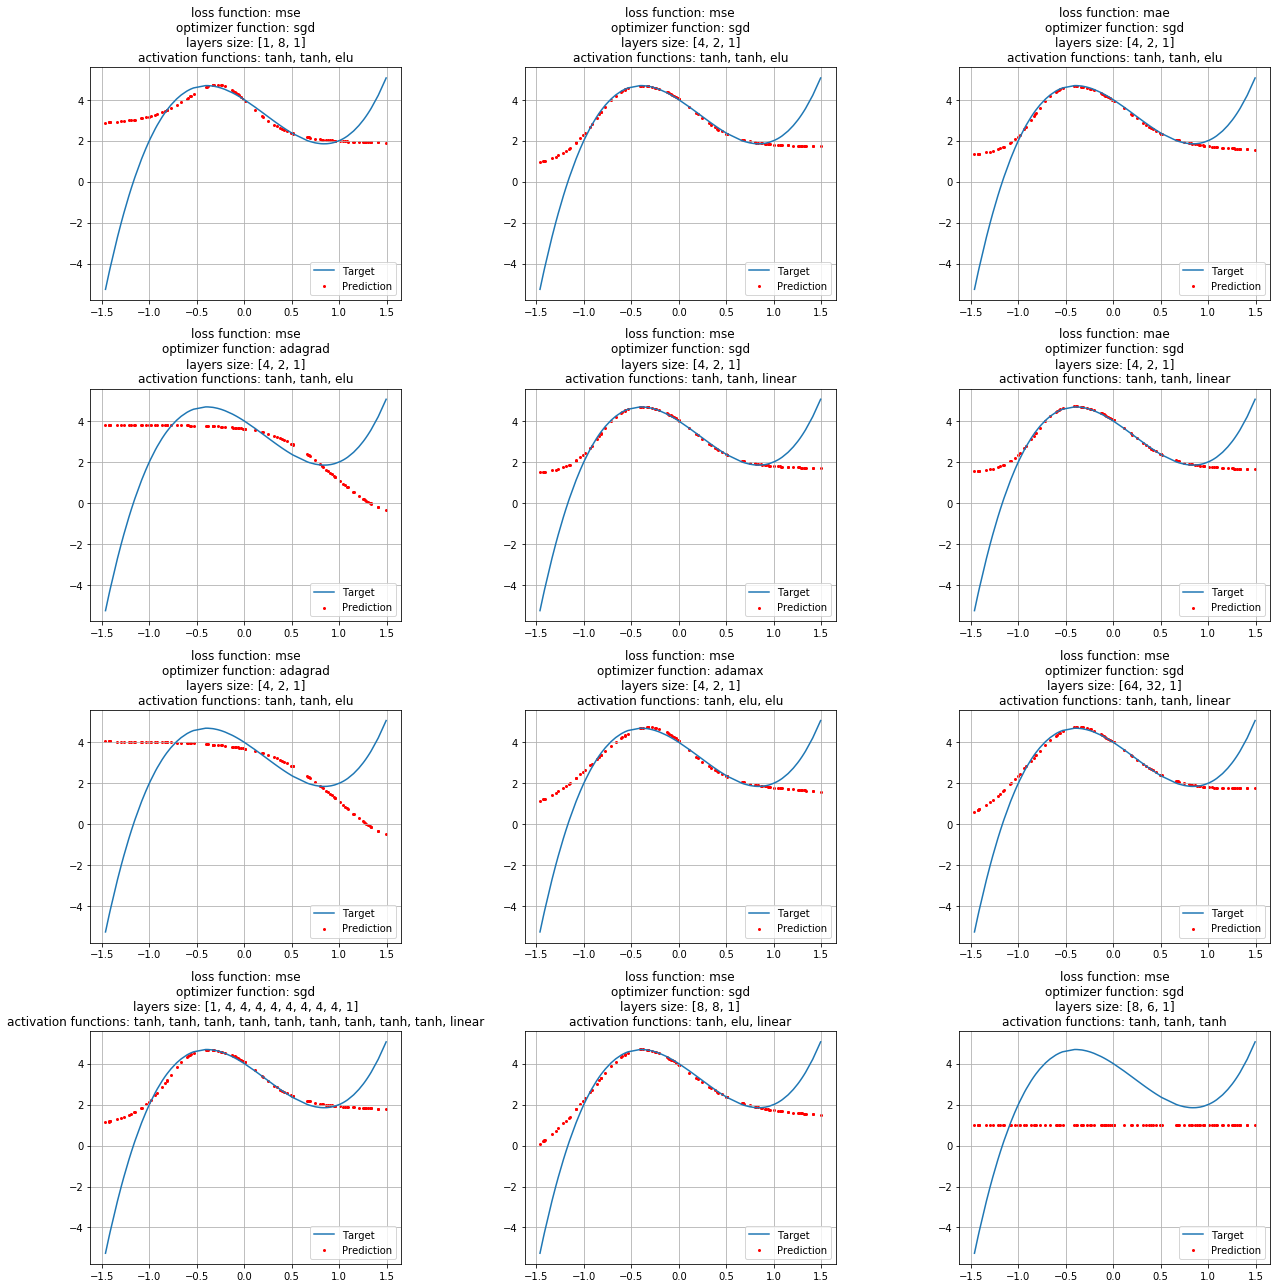

In [23]:
n_cols = 3
fig, axes = plt.subplots(nrows = len(models) // n_cols, ncols = n_cols, figsize = (18, n_cols * 6))
axes = axes.flatten()
  
in_target = np.random.uniform(-1.5, 1.5, 100)
in_target.sort()
out_target = polynomial(in_target, target_parameters)

for plot_n, (model, history) in enumerate(zip(models, model_histories)):
    axes[plot_n].set_title(
        "loss function: " + model.loss_fn
        + "\noptimizer function: " + model.optimizer_fn
        + "\nlayers size: " + str(model.layers_size)
        + "\nactivation functions: " + ", ".join(model.activation_functions)
    )
    out_predicted = model.network.predict(in_target)
    axes[plot_n].plot(in_target, out_target)
    axes[plot_n].scatter(in_target, out_predicted, color = "red", s = 4)
    axes[plot_n].legend(["Target", "Prediction"], loc = "best")
    axes[plot_n].grid(True)

fig.tight_layout()
plt.show()